# Advanced Visualization 1
Di section ini, kita akan belajar cara membuat word cloud dan waffle charts. Selanjutnya kita akan mulai belajar tentang library visualisasi tambahan yang berbasis Matplotlib, yaitu library seaborn, dan kita akan belajar cara membuat plot regresi menggunakan library seaborn.

<img src="https://i.ibb.co/wd9YxzM/anatomy-matplotlib.png" width="650" align="center">
<br>

Toolkit: Section ini sangat bergantung pada pandas dan Numpy untuk data wrangling, analysis, dan visualization. 

Datasets:

1. Imigrasi ke Kanada dari 1980 hingga 2013 - Aliran migrasi internasional ke dan dari negara-negara tertentu - Revisi 2015 dari situs web Perserikatan Bangsa-Bangsa. Dataset tersebut berisi data tahunan arus migran internasional yang dicatat oleh negara tujuan. Data tersebut menyajikan arus masuk dan arus keluar menurut tempat lahir, kewarganegaraan atau tempat tinggal sebelumnya/selanjutnya baik untuk orang asing maupun warga negara. Untuk pelajaran ini, kami akan fokus pada data Imigrasi Kanada

In [1]:
import numpy as np  
import pandas as pd
from PIL import Image # converting images into arrays

In [2]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [3]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [4]:
print(df_can.shape)

(195, 43)


In [5]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)
df_can.head(3)

OdName AreaName          RegName             DevName  1980  1981  \
0  Afghanistan     Asia    Southern Asia  Developing regions    16    39   
1      Albania   Europe  Southern Europe   Developed regions     1     0   
2      Algeria   Africa  Northern Africa  Developing regions    80    67   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...  2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...  1450  1223   856   702   560   716   561   
2    71    69    63    44  ...  3616  3626  4807  3623  4005  5393  4752   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  
2  4325  3774  4331  

[3 rows x 38 columns]

In [6]:
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)
df_can.head(3)

Country Continent           Region             DevName  1980  1981  \
0  Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1      Albania    Europe  Southern Europe   Developed regions     1     0   
2      Algeria    Africa  Northern Africa  Developing regions    80    67   

   1982  1983  1984  1985  ...  2004  2005  2006  2007  2008  2009  2010  \
0    39    47    71   340  ...  2978  3436  3009  2652  2111  1746  1758   
1     0     0     0     0  ...  1450  1223   856   702   560   716   561   
2    71    69    63    44  ...  3616  3626  4807  3623  4005  5393  4752   

   2011  2012  2013  
0  2203  2635  2004  
1   539   620   603  
2  4325  3774  4331  

[3 rows x 38 columns]

In [7]:
df_can.columns

Index([  'Country', 'Continent',    'Region',   'DevName',        1980,
              1981,        1982,        1983,        1984,        1985,
              1986,        1987,        1988,        1989,        1990,
              1991,        1992,        1993,        1994,        1995,
              1996,        1997,        1998,        1999,        2000,
              2001,        2002,        2003,        2004,        2005,
              2006,        2007,        2008,        2009,        2010,
              2011,        2012,        2013],
      dtype='object')

In [8]:
# merubah label kolom menjadi string
df_can.columns = list(map(str, df_can.columns))
print(df_can.columns)

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')


## Example Map
map(function, iterables)

* **function** : 	Wajib diisi. Fungsi yang akan dijalankan untuk setiap item

* **iterable** :	Wajib diisi. Urutan, koleksi, atau objek iterator. Anda dapat mengirim iterable sebanyak yang Anda suka, pastikan fungsi tersebut memiliki satu parameter untuk setiap iterable.

In [9]:
# menghitung jumlah huruf pada suatu kata
def myfunc(n):
    return len(n)

x = map(myfunc, {'apple', 'banana', 'cherry'})
print(list(x))

[5, 6, 6]


In [10]:
# menggabungkan kata pada variabel a dan b
def myfunc(a, b):
    return a+b

x = map(myfunc, {'apple', 'banana', 'cherry'}, {'orange', 'lemon', 'pineapple'})
print(list(x))

['applepineapple', 'cherryorange', 'bananalemon']


In [11]:
raw_data = {"first_name": ["Ria", "Aiza", "Ali", "Faiz", "Shakila"],
            "last_name": ["Fajriyah", "Azzahra", "Akbar", "AlHadi", "Azkiya"],
            "age": [19, 16, 27, 29, 20],
            "rating_score": [90, 75, 85, 80, 60]}

df_data = pd.DataFrame(raw_data, columns = ["first_name", "last_name", "age", "rating_score"])
print(df_data)

  first_name last_name  age  rating_score
0        Ria  Fajriyah   19            90
1       Aiza   Azzahra   16            75
2        Ali     Akbar   27            85
3       Faiz    AlHadi   29            80
4    Shakila    Azkiya   20            60


In [12]:
Subject = {"Ria" : "Science",
           "Aiza" : "Doctor",
           "Ali" : "Social", 
           "Faiz" : "Economy", 
           "Shakila" : "Math"}
print(Subject)

{'Ria': 'Science', 'Aiza': 'Doctor', 'Ali': 'Social', 'Faiz': 'Economy', 'Shakila': 'Math'}


In [13]:
df_data["Subject"] = df_data["first_name"].map(Subject)
print(df_data)

  first_name last_name  age  rating_score  Subject
0        Ria  Fajriyah   19            90  Science
1       Aiza   Azzahra   16            75   Doctor
2        Ali     Akbar   27            85   Social
3       Faiz    AlHadi   29            80  Economy
4    Shakila    Azkiya   20            60     Math


In [14]:
df_can.columns = list(map(str, df_can.columns))
print(df_can.columns)

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')


In [15]:
df_can.index

RangeIndex(start=0, stop=195, step=1)

In [16]:
df_can.set_index('Country', inplace=True)
print(df_can.index)

Index(['Afghanistan', 'Albania', 'Algeria', 'American Samoa', 'Andorra',
       'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       ...
       'United States of America', 'Uruguay', 'Uzbekistan', 'Vanuatu',
       'Venezuela (Bolivarian Republic of)', 'Viet Nam', 'Western Sahara',
       'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='Country', length=195)


In [17]:
print(df_can.head(1))

            Continent         Region             DevName  1980  1981  1982  \
Country                                                                      
Afghanistan      Asia  Southern Asia  Developing regions    16    39    39   

             1983  1984  1985  1986  ...  2004  2005  2006  2007  2008  2009  \
Country                              ...                                       
Afghanistan    47    71   340   496  ...  2978  3436  3009  2652  2111  1746   

             2010  2011  2012  2013  
Country                              
Afghanistan  1758  2203  2635  2004  

[1 rows x 37 columns]


In [18]:
df_can['Total'] = df_can.sum(axis=1, numeric_only=True)
df_can.head(1)

Continent         Region             DevName  1980  1981  1982  \
Country                                                                      
Afghanistan      Asia  Southern Asia  Developing regions    16    39    39   

             1983  1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  \
Country                              ...                                       
Afghanistan    47    71   340   496  ...  3436  3009  2652  2111  1746  1758   

             2011  2012  2013  Total  
Country                               
Afghanistan  2203  2635  2004  58639  

[1 rows x 38 columns]

In [19]:
years = list(map(str, range(1980, 2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


## Visualizing Data using Matplotlib

In [20]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

mpl.style.use('ggplot')

print('Matplotlib version:', mpl.__version__)

Matplotlib version: 3.5.2


## Waffle Charts (Optional)
Waffle chart adalah visualisasi menarik yang biasanya dibuat untuk menampilkan progress menuju tujuan. Waffle Chart biasanya merupakan opsi yang efektif saat kalian mencoba menambahkan fitur visualisasi yang menarik ke visual yang sebagian besar terdiri dari sel, seperti dasbor Excel.

Waffle charts menunjukkan kemajuan menuju target atau persentase penyelesaian. Ada kotak sel kecil, di mana sel berwarna mewakili data.

Bagan dapat terdiri dari satu kategori atau beberapa kategori. Beberapa grafik wafel dapat disatukan untuk menunjukkan perbandingan antara grafik yang berbeda.

Kasus penggunaan yang bagus

* Membandingkan item tingkat tinggi atau melihat bagaimana mereka berkontribusi secara keseluruhan
* Menempatkan peningkatan penekanan pada bagian dari keseluruhan
* Menggunakan grafik KPI (Key Performance Indicator) sebagai % dari total

Kasus penggunaan yang tidak cocok

* Ketika banyak nilai berkontribusi pada keseluruhan
* Ketika KPI yang diukur bisa melebihi 100%
* Ketika persentase yang tepat sangat penting, karena menunjukkan pecahan persen lebih sulit untuk dilihat di luar perkiraan kasar 

source : https://www.tableau.com/about/blog/2017/4/viz-variety-show-precise-waffle-charts-68462

**Menggunakan studi kasus sebelumnya tentang Denmark, Norwegia, dan Swedia**

In [21]:
df_dns = df_can.loc[['Denmark', 'Norway', 'Sweden'], :]
df_dns

Continent           Region            DevName  1980  1981  1982  1983  \
Country                                                                         
Denmark    Europe  Northern Europe  Developed regions   272   293   299   106   
Norway     Europe  Northern Europe  Developed regions   116    77   106    51   
Sweden     Europe  Northern Europe  Developed regions   281   308   222   176   

         1984  1985  1986  ...  2005  2006  2007  2008  2009  2010  2011  \
Country                    ...                                             
Denmark    93    73    93  ...    62   101    97   108    81    92    93   
Norway     31    54    56  ...    57    53    73    66    75    46    49   
Sweden    128   158   187  ...   205   139   193   165   167   159   134   

         2012  2013  Total  
Country                     
Denmark    94    81   3901  
Norway     53    59   2327  
Sweden    140   140   5866  

[3 rows x 38 columns]

**Step 1. Menentukan proporsi setiap kategori sehubungan dengan totalnya**

In [22]:
total_values = sum(df_dns['Total'])
total_values

12094

In [23]:
category_proportions = [(float(value) / total_values) for value in df_dns['Total']]
print(category_proportions)
print(type(category_proportions))

[0.32255663965602777, 0.1924094592359848, 0.48503390110798744]
<class 'list'>


In [24]:
for i, proportion in enumerate(category_proportions):
    print(df_dns.index.values[i] + ':' + str(proportion))

Denmark:0.32255663965602777
Norway:0.1924094592359848
Sweden:0.48503390110798744


enumerate(iterable, start)

* iterable :	An iterable object
* start :	A Number. Defining the start number of the enumerate object. Default 0

In [25]:
x = ('apple', 'banana', 'cherry')
y = enumerate(x)
print(list(y))

[(0, 'apple'), (1, 'banana'), (2, 'cherry')]


In [26]:
listA = [0.32255663965602777, 0.1924094592359848, 0.48503390110798744]
for idx, value in enumerate(listA):
    print('index : ' + str(idx) + ', ' + str(value))

index : 0, 0.32255663965602777
index : 1, 0.1924094592359848
index : 2, 0.48503390110798744


**Step 2 : Menentukan Ukuran Keseluruhan Waffle Chart**

In [27]:
width = 40
height = 10

total_num_tiles = width * height

print('Total number of tiles is', total_num_tiles)

Total number of tiles is 400


**Step 3 : Menggunakan Proporsi tiap Kategori**

In [28]:
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]
tiles_per_category

[129, 77, 194]

In [29]:
for i, tiles in enumerate(tiles_per_category):
    print(df_dns.index.values[i] + ':' + str(tiles))

Denmark:129
Norway:77
Sweden:194


Berdasarkan proporsi yang dihitung, Denmark akan menempati 129 tiles, Norwegia akan menempati 77 tiles, dan Swedia akan menempati 194 tiles.

**Step 4 : Membuat Matriks yang Menyerupai Waffle dan Mengisinya**

In [30]:
waffle_chart = np.zeros((height, width))

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
            
        waffle_chart[row, col] = category_index
        
print('Waffle Chart Populated!')        

Waffle Chart Populated!


In [31]:
waffle_chart

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
        2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
        3., 3., 3., 3., 3., 3., 3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2.,
   

Seperti yang diharapkan, matriks terdiri dari tiga kategori dan jumlah total instance setiap kategori sesuai dengan jumlah tiles yang dialokasikan untuk setiap kategori

**Step 5 : Petakan Matriks Waffle Chart menjadi Visual**

<Figure size 640x480 with 0 Axes>

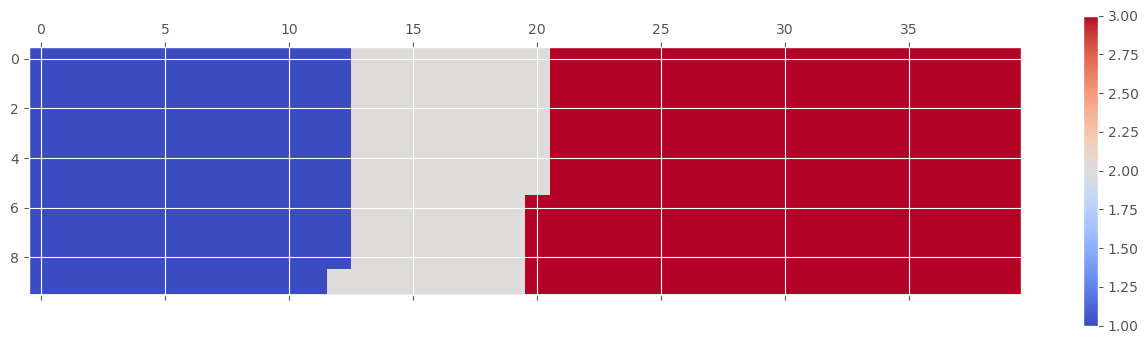

In [32]:
# menginstansiasi figure objek baru
fig = plt.figure()

# menggunakan matshow untuk menampilkan waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

**Step 6 : Mempercantik Chart**

([], [])

<Figure size 640x480 with 0 Axes>

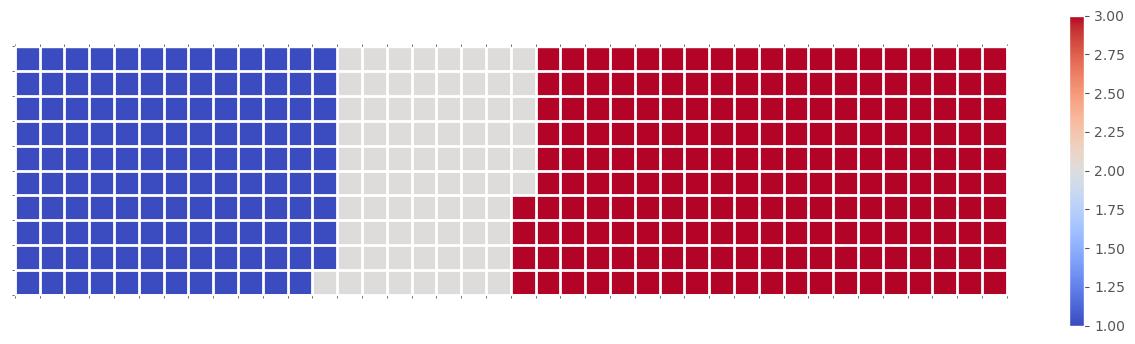

In [33]:
# menginstansiasi figure objek baru
fig = plt.figure()

# menggunakan matshow untuk menampilkan waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# mendapatkan axis
ax = plt.gca()

# mengatur minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# menambahkan gridlines pada minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

**Step 7 : Menambahkan Legend**

<Figure size 640x480 with 0 Axes>

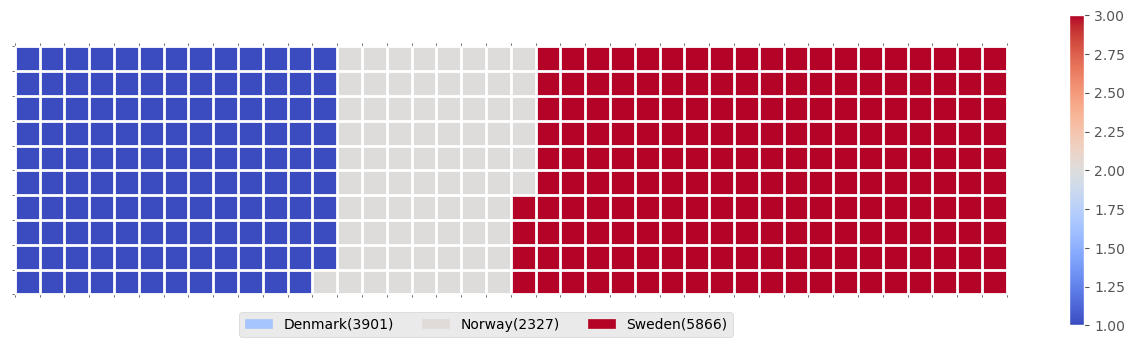

In [34]:
# menginstansiasi figure objek baru
fig = plt.figure()

# menggunakan matshow untuk menampilkan waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()

# mendapatkan axis
ax = plt.gca()

# mengatur minor ticks
ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

# menambahkan gridlines pada minor ticks
ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])

# menghitung jumlah kumulatif dari masing-masing kategori untuk mencocokkan skema warna antara bagan dan legend
values_cumsum = np.cumsum(df_dns['Total'])
total_values = values_cumsum[len(values_cumsum) -1]

# membuat legend
legend_handles = []
for i, category in enumerate(df_dns.index.values):
    label_str = category + '(' + str(df_dns['Total'][i])+')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    
# menambahkan legend ke chart
plt.legend(handles=legend_handles,
           loc='lower center',
           ncol=len(df_dns.index.values),
           bbox_to_anchor=(0., -0.2, 0.95, .1)
          )

Sekarang akan sangat tidak efisien untuk mengulangi ketujuh langkah ini setiap kali kita ingin membuat waffle. Jadi mari kita gabungkan ketujuh langkah menjadi satu fungsi yang disebut create_waffle_chart. Fungsi ini akan mengambil parameter berikut sebagai masukan:

1. **categories**: Unique categories or classes in dataframe.
2. **values**: Values corresponding to categories or classes.
3. **height**: Defined height of waffle chart.
4. **width**: Defined width of waffle chart.
5. **colormap**: Colormap class
6. **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.

In [35]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):
    
    # menghitung proporsi setiap kategori sehubungan dengan total
    total_values = sum(values)
    category_proportions = [(float(value)/total_values)for value in values]
    
    # menghitung total tiles
    total_num_tiles = width*height
    print('Total number of tiles is', total_num_tiles)
    
    # menghitung jumlah tiles dari setiap kategori
    tiles_per_category = [round(proportion*total_num_tiles) for proportion in category_proportions]
    
    # mencetak jumlah tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(df_dns.index.values[i] + ':' + str(tiles))
    
    # menginisialisasi waffle chart sebagai matriks kosong
    waffle_chart = np.zeros((height, width))

    # menentukan indeks untuk looping melalui waffle chart
    category_index = 0
    tile_index = 0

    for col in range(width):
        for row in range(height):
            tile_index += 1

            if tile_index > sum(tiles_per_category[0:category_index]):
                category_index += 1

            waffle_chart[row, col] = category_index    

    # menginstansiasi figure objek baru
    fig = plt.figure()

    # menggunakan matshow untuk menampilkan waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # mendapatkan axis
    ax = plt.gca()

    # mengatur minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

    # menambahkan gridlines pada minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # menghitung jumlah kumulatif dari masing-masing kategori untuk mencocokkan skema warna antara bagan dan legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) -1]

    # membuat legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + '(' + str(values[i]) + value_sign +')'
        else:
            label_str = category + '(' + value_sign + str(values[i])+')'
        
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # menambahkan legend ke chart
    plt.legend(handles=legend_handles,
               loc='lower center',
               ncol=len(df_dns.index.values),
               bbox_to_anchor=(0., -0.2, 0.95, .1)
              )

Sekarang untuk membuat `waffle`, yang harus dilakukan adalah memanggil fungsi `create_waffle_chart`. Mari tentukan parameter input:

In [36]:
width = 50
height = 20

categories = df_dns.index.values
values = df_dns['Total']

colormap = plt.cm.coolwarm

Memanggil fungsi untuk membuat `waffle`

Total number of tiles is 1000
Denmark:323
Norway:192
Sweden:485


<Figure size 640x480 with 0 Axes>

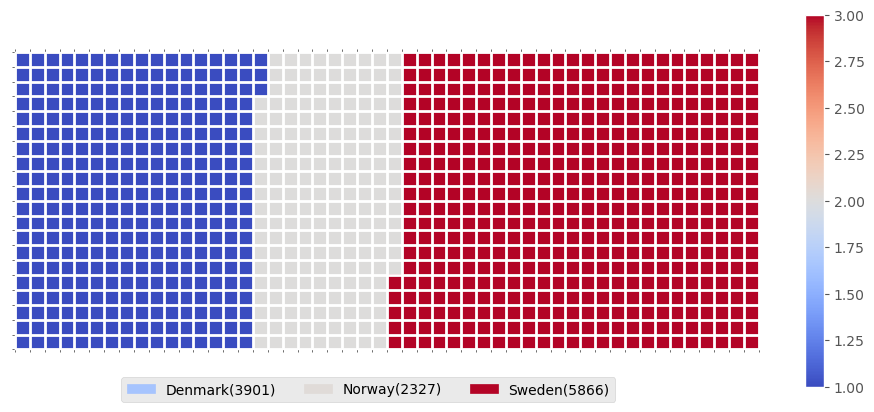

In [37]:
create_waffle_chart(categories, values, height, width, colormap)

<Figure size 640x480 with 0 Axes>

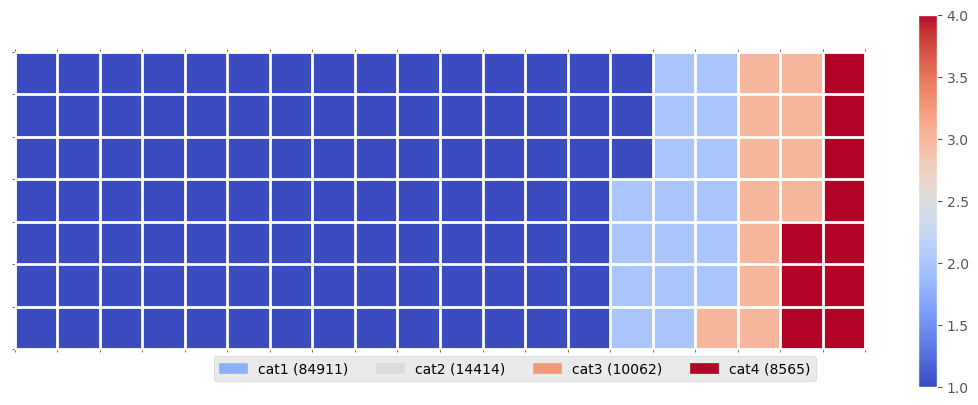

In [38]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Let's make a default data frame with catagories and values.
df = pd.DataFrame({ 'catagories': ['cat1', 'cat2', 'cat3', 'cat4'], 
                    'values': [84911, 14414, 10062, 8565] })
# Now, we define a desired height and width.
waffle_plot_width = 20
waffle_plot_height = 7

classes = df['catagories']
values = df['values']

def waffle_plot(classes, values, height, width, colormap):

    # Compute the portion of the total assigned to each class.
    class_portion = [float(v)/sum(values) for v in values]

    # Compute the number of tiles for each catagories.
    total_tiles = width * height
    tiles_per_class = [round(p*total_tiles) for p in class_portion]

    # Make a dummy matrix for use in plotting.
    plot_matrix = np.zeros((height, width))

    # Popoulate the dummy matrix with integer values.
    class_index = 0
    tile_index = 0

    # Iterate over each tile.
    for col in range(waffle_plot_width):
        for row in range(height):
            tile_index += 1

            # If the number of tiles populated is sufficient for this class...
            if tile_index > sum(tiles_per_class[0:class_index]):

                # ...increment to the next class.
                class_index += 1       

            # Set the class value to an integer, which increases with class.
            plot_matrix[row, col] = class_index

    # Create a new figure.
    fig = plt.figure()

    # Using matshow solves your "non-square" problem. 
    plt.matshow(plot_matrix, cmap=colormap)
    plt.colorbar()

    # Get the axis.
    ax = plt.gca()

    # Minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True);
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True);

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    # Manually constructing a legend solves your "catagorical" problem.
    legend_handles = []
    for i, c in enumerate(classes):
        lable_str = c + " (" + str(values[i]) + ")"
        color_val = colormap(float(i+1)/len(classes))
        legend_handles.append(mpatches.Patch(color=color_val, label=lable_str))

    # Add the legend. Still a bit of work to do here, to perfect centering.
    plt.legend(handles=legend_handles, loc=1, ncol=len(classes),
               bbox_to_anchor=(0., -0.1, 0.95, .10))

    plt.xticks([])
    plt.yticks([])

# Call the plotting function.
waffle_plot(classes, values, waffle_plot_height, waffle_plot_width,
            plt.cm.coolwarm)

 https://github.com/gyli/PyWaffle

In [39]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [40]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

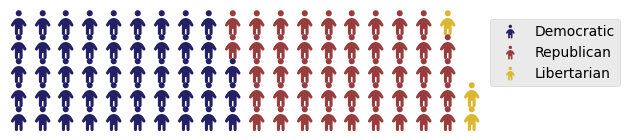

In [41]:
data = {'Democratic': 48, 'Republican': 46, 'Libertarian': 3}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=("#232066", "#983D3D", "#DCB732"),
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='child', icon_size=18, 
    icon_legend=True
)

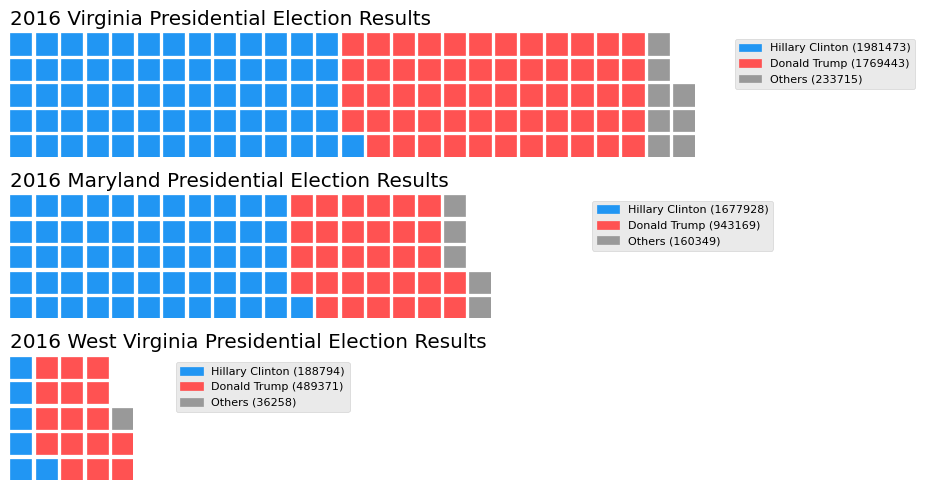

In [42]:
import pandas as pd
data = pd.DataFrame(
    {
        'labels': ['Hillary Clinton', 'Donald Trump', 'Others'],
        'Virginia': [1981473, 1769443, 233715],
        'Maryland': [1677928, 943169, 160349],
        'West Virginia': [188794, 489371, 36258],
    },
).set_index('labels')

fig = plt.figure(
    FigureClass=Waffle,
    plots={
        311: {
            'values': data['Virginia'] / 30000,
            'labels': ["{0} ({1})".format(n, v) for n, v in data['Virginia'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 8},
            'title': {'label': '2016 Virginia Presidential Election Results', 'loc': 'left'}
        },
        312: {
            'values': data['Maryland'] / 30000,
            'labels': ["{0} ({1})".format(n, v) for n, v in data['Maryland'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.2, 1), 'fontsize': 8},
            'title': {'label': '2016 Maryland Presidential Election Results', 'loc': 'left'}
        },
        313: {
            'values': data['West Virginia'] / 30000,
            'labels': ["{0} ({1})".format(n, v) for n, v in data['West Virginia'].items()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.3, 1), 'fontsize': 8},
            'title': {'label': '2016 West Virginia Presidential Election Results', 'loc': 'left'}
        },
    },
    rows=5,
    colors=("#2196f3", "#ff5252", "#999999"),  # Default argument values for subplots
    figsize=(9, 5)  # figsize is a parameter of plt.figure
)

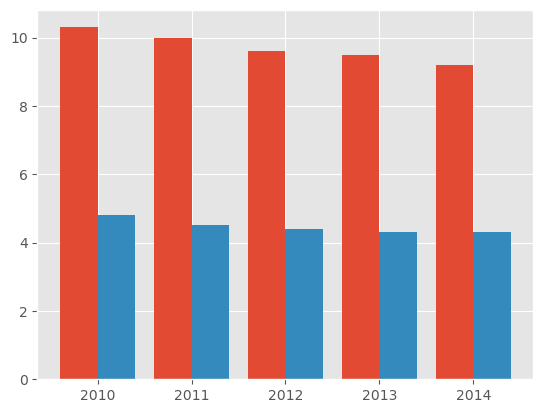

In [43]:
#or bar chart, you need to specify the x-location of all the bars. The simplest way if you have no explicit x-values is to use a range 0, 1, 2, 3, ... and so on. So if you have N bars to plot, you can generate N x-values using range() or use labels as the x-argument
labels =  np.arange(2010,2015)

scores = [np.array(['10.3', '10', '9.6', '9.5', '9.2'], dtype='<U10'), 
          np.array(['4.8', '4.5', '4.4', '4.3', '4.3'], dtype='<U10')]

bp_dict = plt.bar(labels, list(map(float, scores[0])), align='edge', width=-0.4)
bp_dict = plt.bar(labels, list(map(float, scores[1])), align='edge', width=0.4)

## Word Clouds
Word clouds (juga dikenal sebagai text clouds atau tag clouds) bekerja dengan cara yang sederhana: semakin banyak kata tertentu muncul dalam sumber data tekstual (seperti pidato, posting blog, atau database), semakin besar dan tebal kata itu muncul di kata cloud.

Untungnya, sebuah package sudah ada di Python untuk menghasilkan word clouds. Package bernama word_cloud dikembangkan oleh Andreas Mueller. Kalian dapat mempelajari lebih lanjut tentang paket dengan mengikuti [link ini](https://github.com/amueller/word_cloud/). https://github.com/amueller/word_cloud/

Mari gunakan package ini untuk mempelajari cara menghasilkan word cloud untuk dokumen teks tertentu.

Pertama, mari instal package-nya.

In [44]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [45]:
from wordcloud import WordCloud, STOPWORDS
print('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


Word clouds biasanya digunakan untuk melakukan analisis tingkat tinggi dan visualisasi data teks. Secara bersamaan, mari kita keluar dari kumpulan data imigrasi dan bekerja dengan contoh yang melibatkan analisis data teks. Mari kita coba menganalisis novel pendek karangan Lewis Carroll berjudul Alice's Adventures in Wonderland. Ayo lanjutkan dan unduh [file .txt](https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt) dari novel.

In [46]:
! wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alicenovel.txt

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [47]:
alice_novel = open('data/alice_novel.txt', 'r').read()
print('File downloaded and saved!')

File downloaded and saved!


In [48]:
alice_novel

'ï»¿Project Gutenberg\'s Alice\'s Adventures in Wonderland, by Lewis Carroll\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\nTitle: Alice\'s Adventures in Wonderland\n\nAuthor: Lewis Carroll\n\nPosting Date: June 25, 2008 [EBook #11]\nRelease Date: March, 1994\n[Last updated: December 20, 2011]\n\nLanguage: English\n\n\n*** START OF THIS PROJECT GUTENBERG EBOOK ALICE\'S ADVENTURES IN WONDERLAND ***\n\n\n\n\n\n\n\n\n\n\nALICE\'S ADVENTURES IN WONDERLAND\n\nLewis Carroll\n\nTHE MILLENNIUM FULCRUM EDITION 3.0\n\n\n\n\nCHAPTER I. Down the Rabbit-Hole\n\nAlice was beginning to get very tired of sitting by her sister on the\nbank, and of having nothing to do: once or twice she had peeped into the\nbook her sister was reading, but it had no pictures or conversations in\nit, \'and what

Selanjutnya, mari gunakan stopwords yang kita impor dari word_cloud. Kita menggunakan set untuk menghapus stopword yang berlebihan.

In [49]:
stopwords = set(STOPWORDS)
stopwords

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

Buatword cloud object dan generate word cloud. Agar lebih ringkas, mari kita buat word cloud hanya dengan menggunakan 2000 kata pertama dalam novel.

In [50]:
# menginstansiasi word cloud objek
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# menggenerate word cloud
alice_wc.generate(alice_novel)

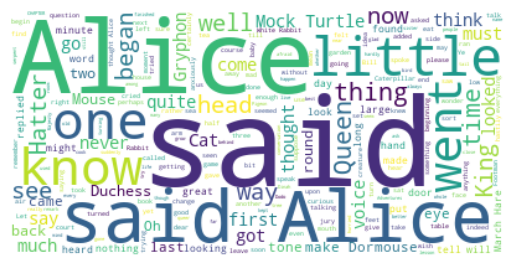

In [51]:
# menampilkan word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Menarik! Jadi di 2000 kata pertama dalam novel, kata yang paling umum adalah Alice, said, little, went dan seterusnya. Mari ubah ukuran cloud sehingga kita dapat melihat kata-kata yang jarang digunakan dengan lebih baik.

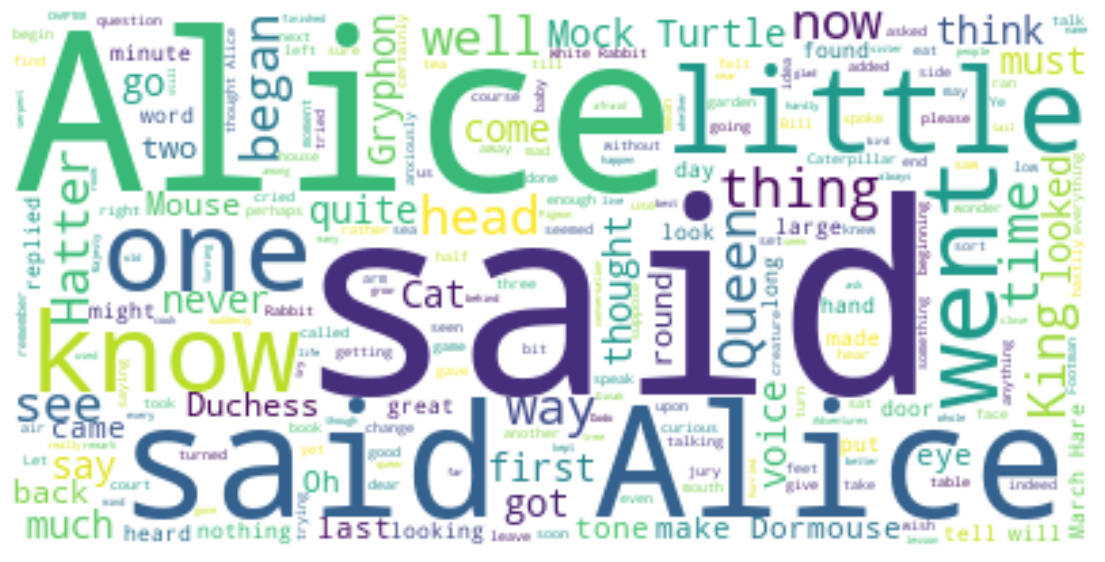

In [52]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# menampilkan word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Jauh lebih baik! Namun, said bukanlah kata yang informatif. Jadi, mari tambahkan ke stopwords kita dan buat ulang cloud.

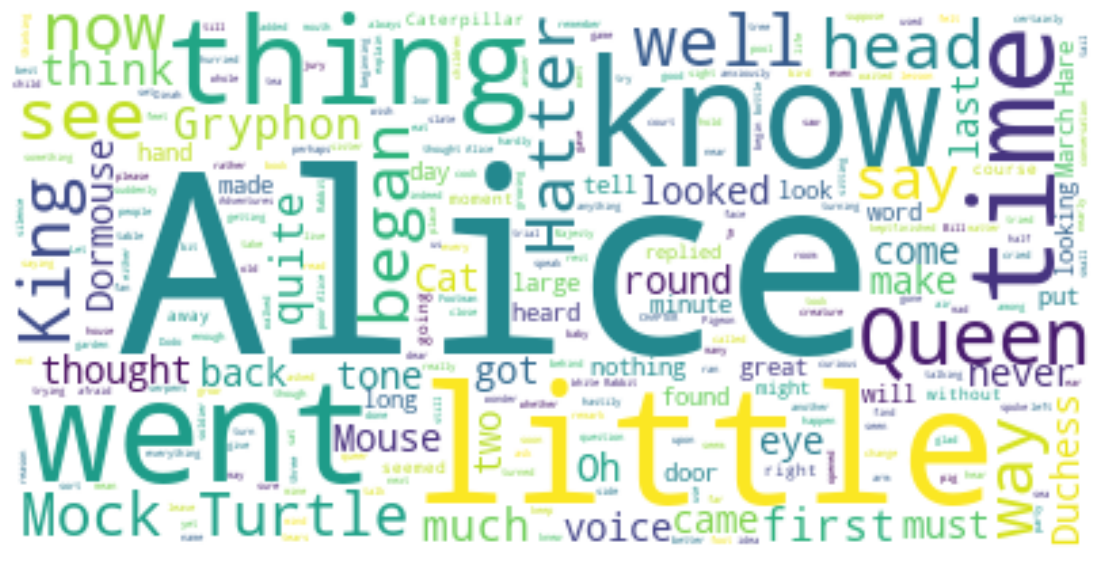

In [53]:
stopwords.update(["said", "one", "go"])

# regenerate word cloud
alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# menampilkan word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Luar biasa! Terlihat sangat menarik! Hal keren lainnya yang dapat kalian terapkan dengan package word_cloud adalah melapiskan kata-kata ke mask dalam bentuk apa pun. Mari kita gunakan mask Alice dan kelincinya. Kami sudah membuatkan mask untuk kalian, jadi mari lanjutkan dan unduh dan beri nama alice_mask.png.

Unduh file berikut [file png](https://github.com/ardhiraka/PFDS_sources/raw/master/alice_mask.png)

In [54]:
from PIL import Image

alice_mask = np.array(Image.open('data/alice_mask.png'))

print('Image downloaded and saved!')

Image downloaded and saved!


In [55]:
alice_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [56]:
alice_mask.shape

(900, 900)

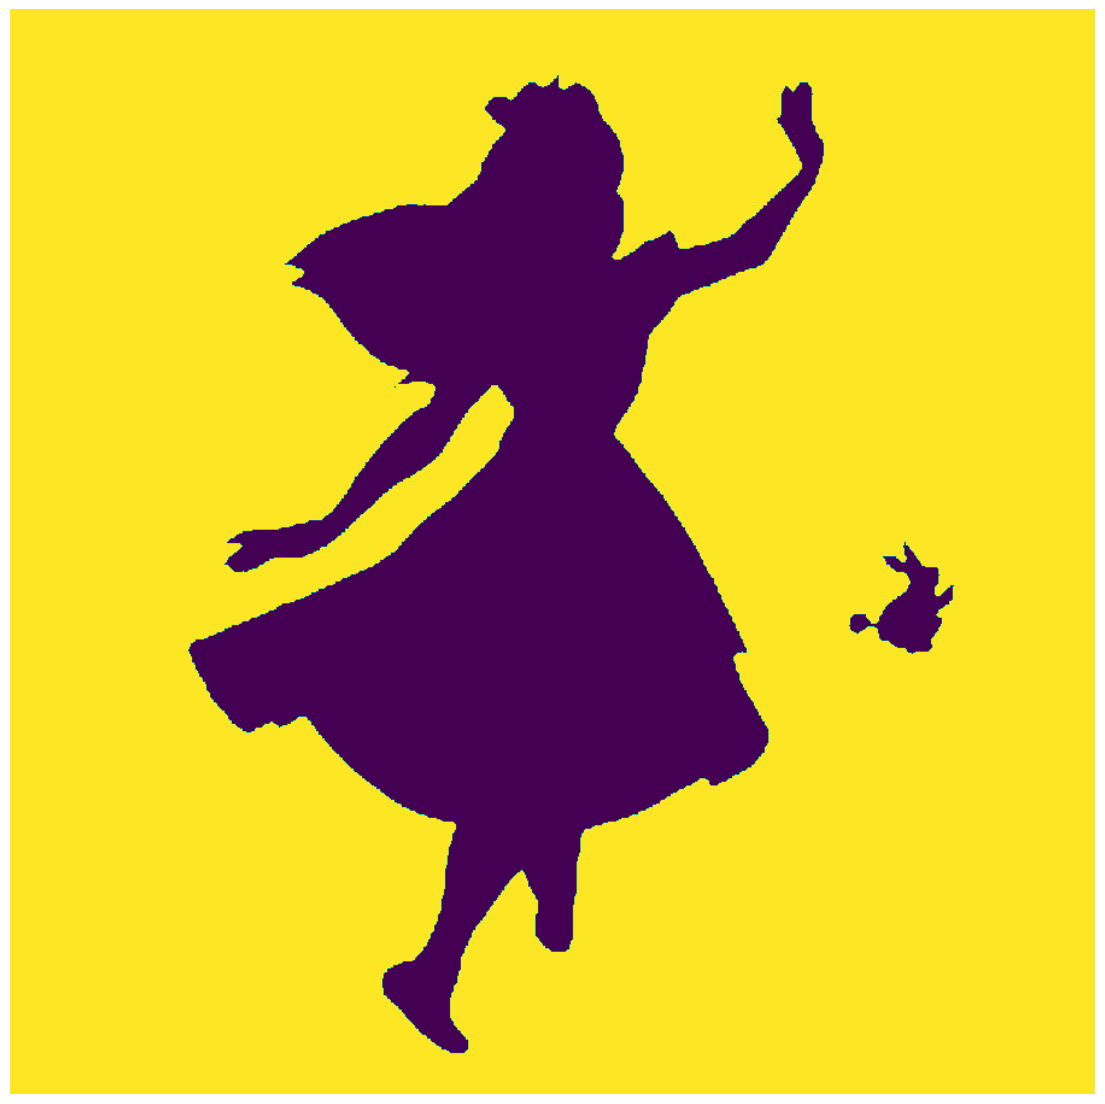

In [57]:
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# menampilkan word cloud
plt.imshow(alice_mask, interpolation='bilinear')
plt.axis('off')
plt.show()

Membentuk word cloud sesuai dengan masking sangat mudah menggunakan word_cloud . Agar simple, kita akan terus menggunakan 2000 kata pertama dalam novel.

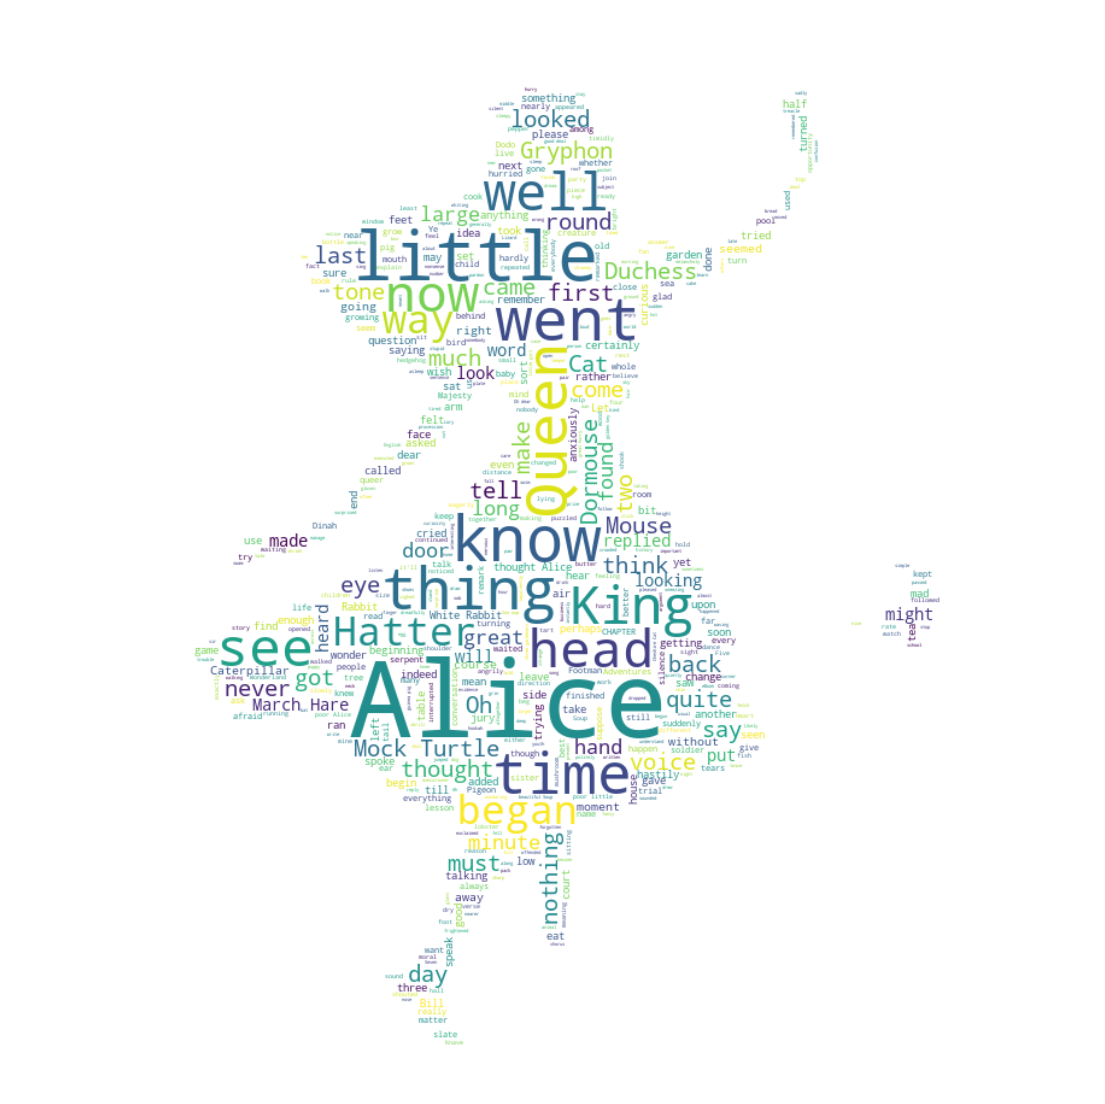

In [58]:
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

# menampilkan word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

Sayangnya data keimigrasian kita tidak memiliki data teks apapun, tapi dimana ada kemauan pasti ada jalan. Mari kita buat contoh data teks dari dataset imigrasi kita, katakanlah data teks 90 kata.

Mari kita ingat seperti apa data kita.

In [59]:
df_can.head()

Continent           Region             DevName  1980  1981  \
Country                                                                     
Afghanistan         Asia    Southern Asia  Developing regions    16    39   
Albania           Europe  Southern Europe   Developed regions     1     0   
Algeria           Africa  Northern Africa  Developing regions    80    67   
American Samoa   Oceania        Polynesia  Developing regions     0     1   
Andorra           Europe  Southern Europe   Developed regions     0     0   

                1982  1983  1984  1985  1986  ...  2005  2006  2007  2008  \
Country                                       ...                           
Afghanistan       39    47    71   340   496  ...  3436  3009  2652  2111   
Albania            0     0     0     0     1  ...  1223   856   702   560   
Algeria           71    69    63    44    69  ...  3626  4807  3623  4005   
American Samoa     0     0     0     0     0  ...     0     1     0     0   
Andorra            0     0     0     0     2  ...     0     1     1     0   

                2009  2010  2011  2012  2013  Total  
Country                                              
Afghanistan     1746  1758  2203  2635  2004  58639  
Albania          716   561   539   620   603  15699  
Algeria         5393  4752  4325  3774  4331  69439  
American Samoa     0     0     0     0     0      6  
Andorra            0     0     0     1     1     15  

[5 rows x 38 columns]

In [60]:
# total imigrasi dari 1980-2013
total_immigration = df_can['Total'].sum()
total_immigration

6409153

Menggunakan countries dengan nama satu kata, mari kita duplikat nama masing-masing negara berdasarkan seberapa besar kontribusi mereka terhadap total imigrasi.

In [61]:
max_words = 90
word_string = ''
for country in df_can.index.values:
    # mengecek apakah nama negara merupakan 1 kata
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# menampilkan generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

Kita tidak berurusan dengan stopwords apa pun di sini, jadi tidak perlu passing saat membuat kata cloud.

In [62]:
# membuat word cloud
wordcloud = WordCloud(background_color='grey').generate(word_string)

print('Word cloud created!')

Word cloud created!


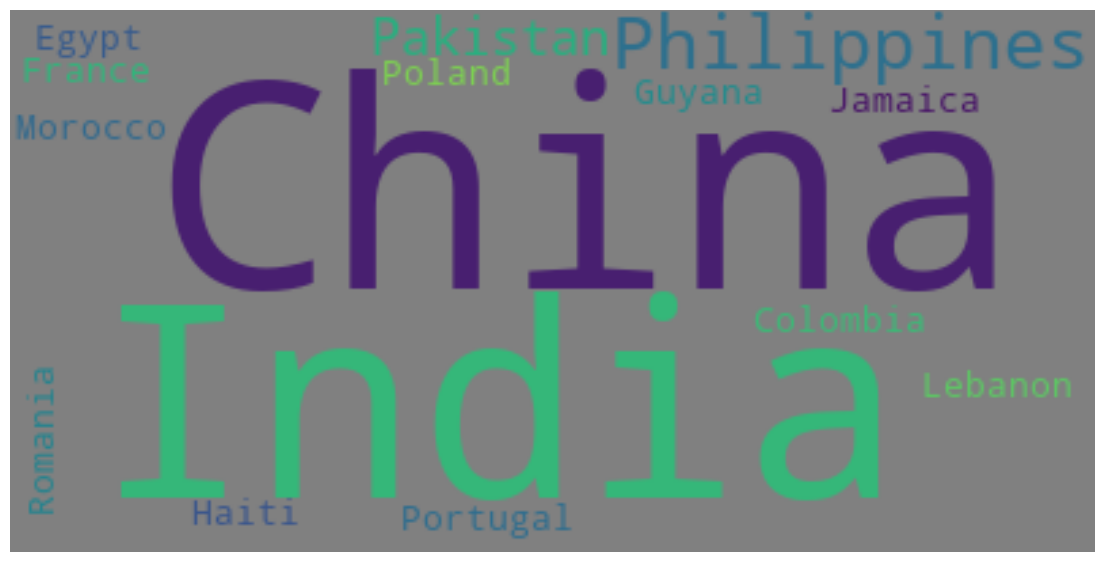

In [63]:
# menampilkan word cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Menurut word cloud di atas, sepertinya mayoritas orang yang berimigrasi berasal dari salah satu dari 15 negara yang ditampilkan oleh word cloud. Satu visual keren yang bisa kalian bangun, mungkin menggunakan peta Kanada dan masking dan melapiskan word cloud di atas peta Kanada. Itu akan menjadi visual yang menarik untuk dibangun!

<hr>

## Regression Plots
Seaborn adalah perpustakaan visualisasi Python berdasarkan matplotlib. Ini menyediakan antarmuka tingkat tinggi untuk menggambar grafik statistik yang menarik. Anda dapat mempelajari lebih lanjut tentang seaborn dengan mengikuti tautan ini dan lebih lanjut tentang plot regresi seaborn dengan mengikuti tautan ini.

http://seaborn.pydata.org/generated/seaborn.regplot.html

Di section ini, kita akan menjelajahi seaborn dan melihat seberapa efisiennya membuat garis regresi dan menyesuaikannya menggunakan pustaka ini!

Mari kita install seaborn

In [64]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [65]:
import seaborn as sns
print('Seaborn installed and imported')

Seaborn installed and imported


Buat dataframe baru yang menyimpan jumlah total imigran yang mendarat ke Kanada per tahun dari 1980 hingga 2013.

In [66]:
years

['1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013']

In [67]:
# menggunakan method sum() untuk mendapatkan total populasi setiap tahun
df_total = pd.DataFrame(df_can[years].sum(axis=0))
df_total

0
1980   99137
1981  110563
1982  104271
1983   75550
1984   73417
1985   69978
1986   86048
1987  134771
1988  139306
1989  164432
1990  188054
1991  207509
1992  221687
1993  222049
1994  193665
1995  187712
1996  200085
1997  192885
1998  160727
1999  179818
2000  216712
2001  242643
2002  223111
2003  217297
2004  232083
2005  257457
2006  247057
2007  232405
2008  243047
2009  248768
2010  276956
2011  246194
2012  256222
2013  257537

In [68]:
# merubah tahun menjadi tipe data float
df_total.index = map(float, df_total.index)
df_total.index

Float64Index([1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0,
              1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0,
              1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0,
              2004.0, 2005.0, 2006.0, 2007.0, 2008.0, 2009.0, 2010.0, 2011.0,
              2012.0, 2013.0],
             dtype='float64')

In [69]:
# mereset index untuk dikembalikan sebagai kolom pada dataframe df_total
df_total.reset_index(inplace=True)
df_total.index

RangeIndex(start=0, stop=34, step=1)

In [70]:
# merename kolom
df_total.columns = ['year', 'total']

# menampilkan final dataframe
df_total.head()

year   total
0  1980.0   99137
1  1981.0  110563
2  1982.0  104271
3  1983.0   75550
4  1984.0   73417

Dengan seaborn, membuat plot regresi semudah memanggil fungsi regplot

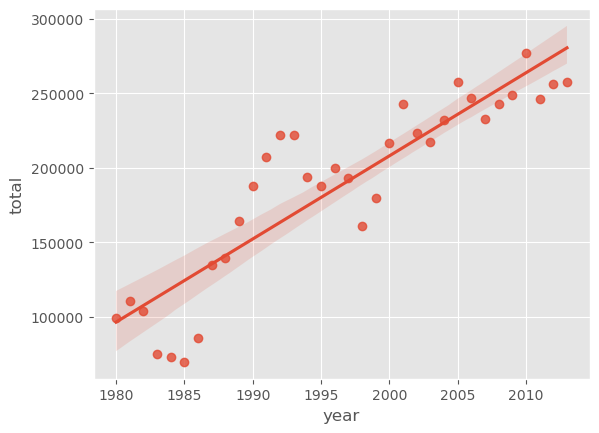

In [71]:
ax = sns.regplot(x='year', y='total', data=df_total)

Kita juga dapat menyesuaikan warna scatter plot dan garis regresi. Mari kita ubah warnanya menjadi hijau

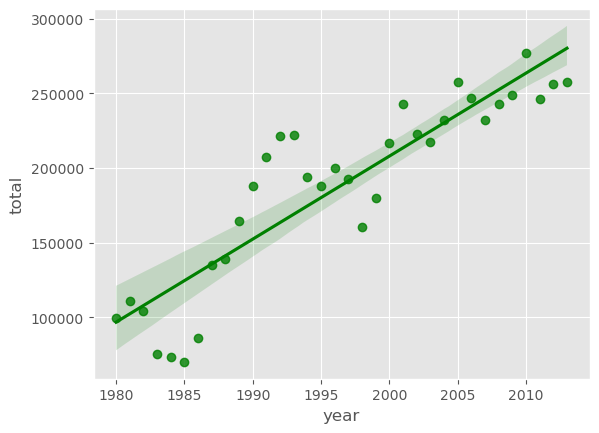

In [72]:
ax = sns.regplot(x='year', y='total', data=df_total, color='green')

Kita selalu dapat menyesuaikan bentuk marker, jadi sebagai ganti circular markers, mari gunakan '+'

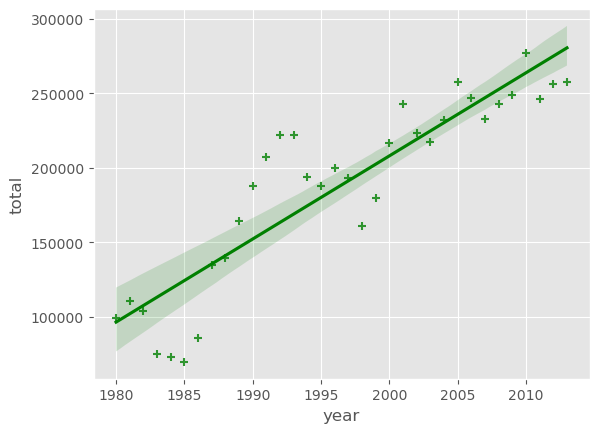

In [73]:
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+')

Mari kita perbesar plotnya sedikit sehingga lebih menarik untuk dilihat.

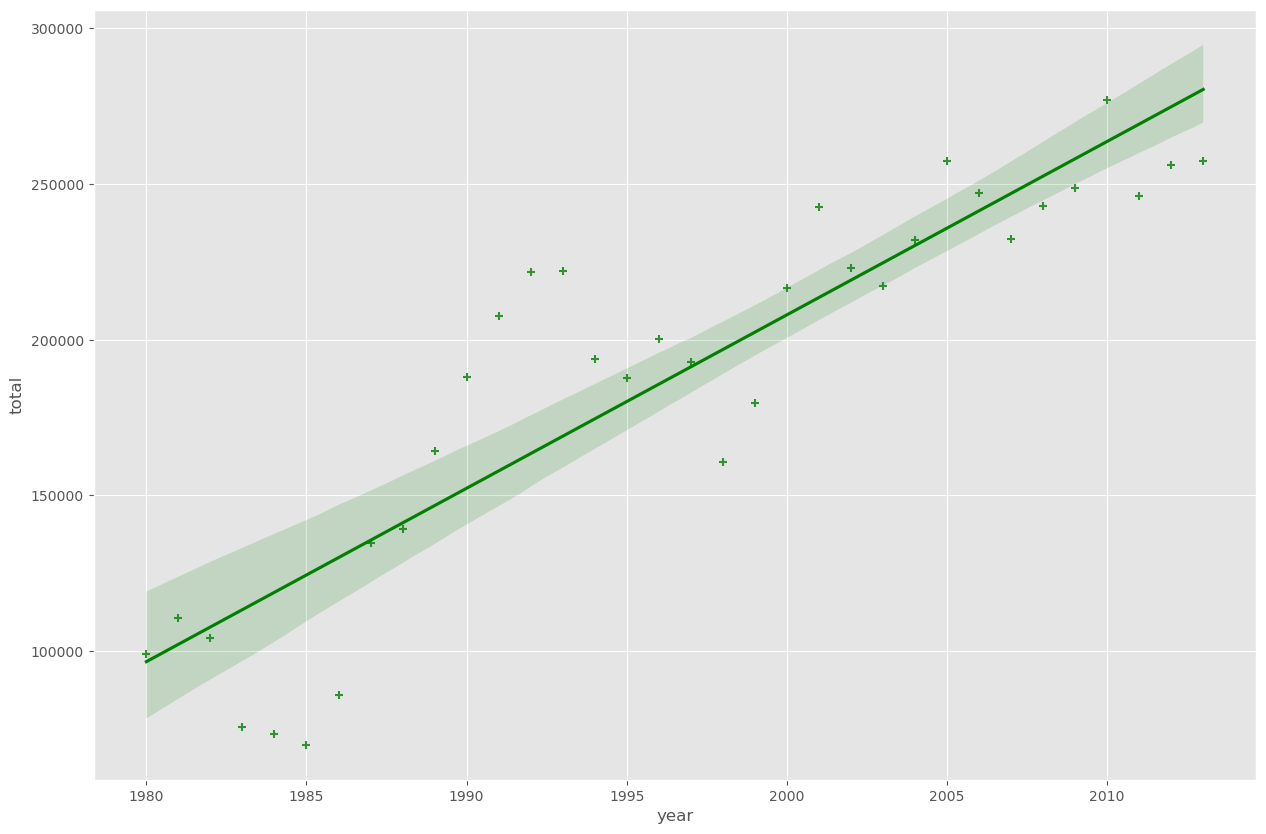

In [74]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+')

Dan mari kita tingkatkan ukuran marker sehingga cocok dengan ukuran baru dari gambar tersebut, dan tambahkan judul serta label x dan y.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

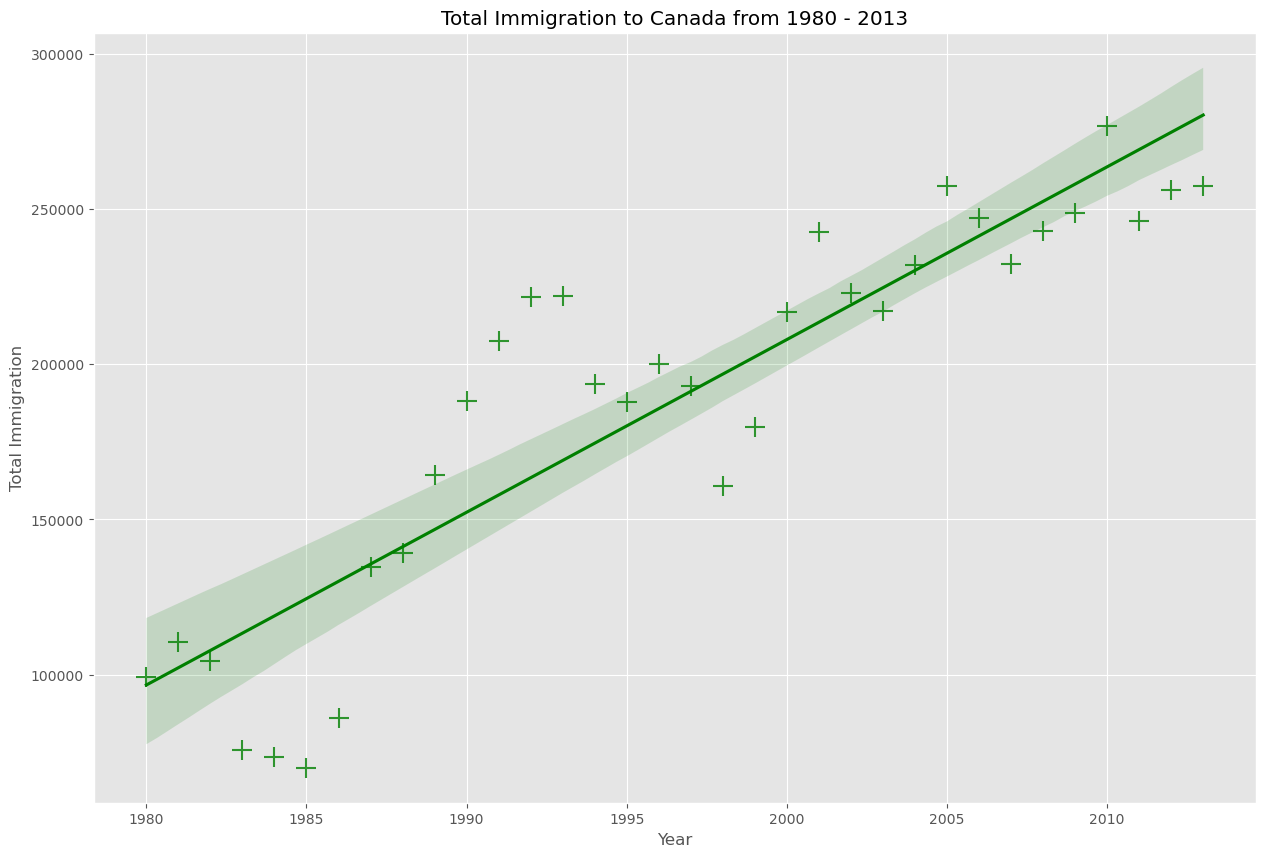

In [75]:
plt.figure(figsize=(15,10))
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Dan terakhir, tingkatkan ukuran font pada label tanda centang, judul, dan label x dan y agar tidak terlihat berbeda!

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

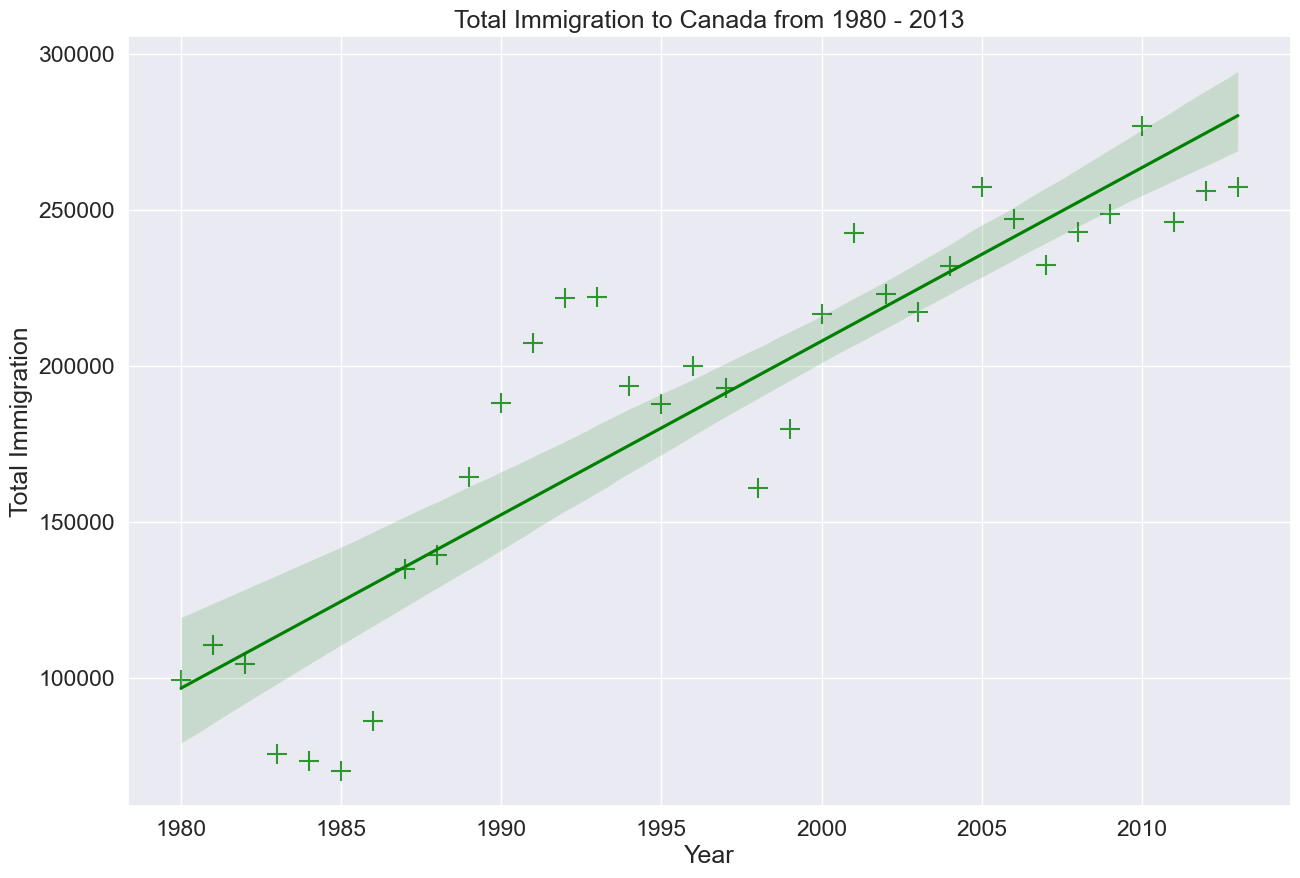

In [76]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Luar biasa! Scatter Plot  lengkap dengan regression fit dengan hanya 5 baris kode.

Jika kalian bukan penggemar background ungu, kalian dapat dengan mudah mengubah gaya ke latar belakang polos putih.

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

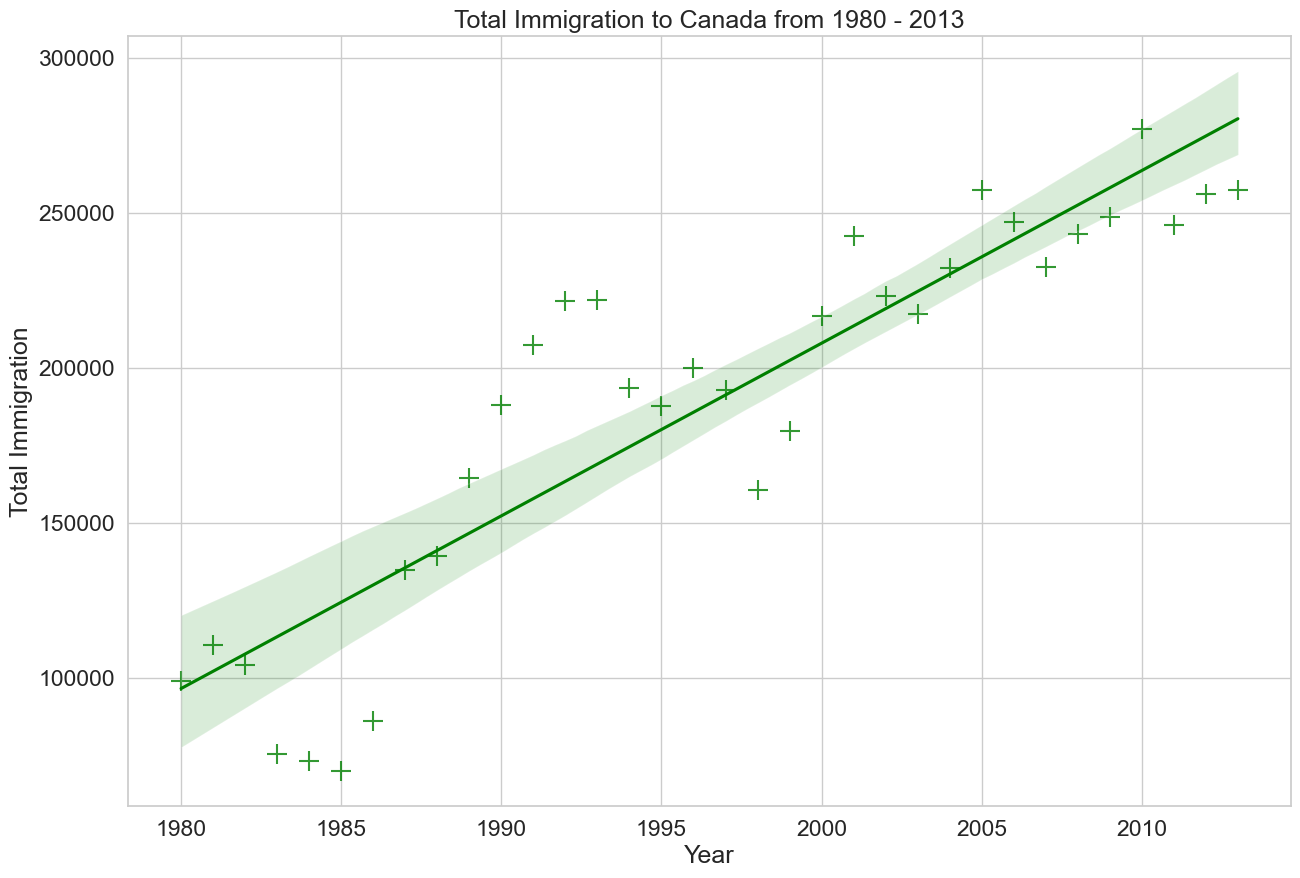

In [77]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('whitegrid') # merubah background menjadi putih dengan grid

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

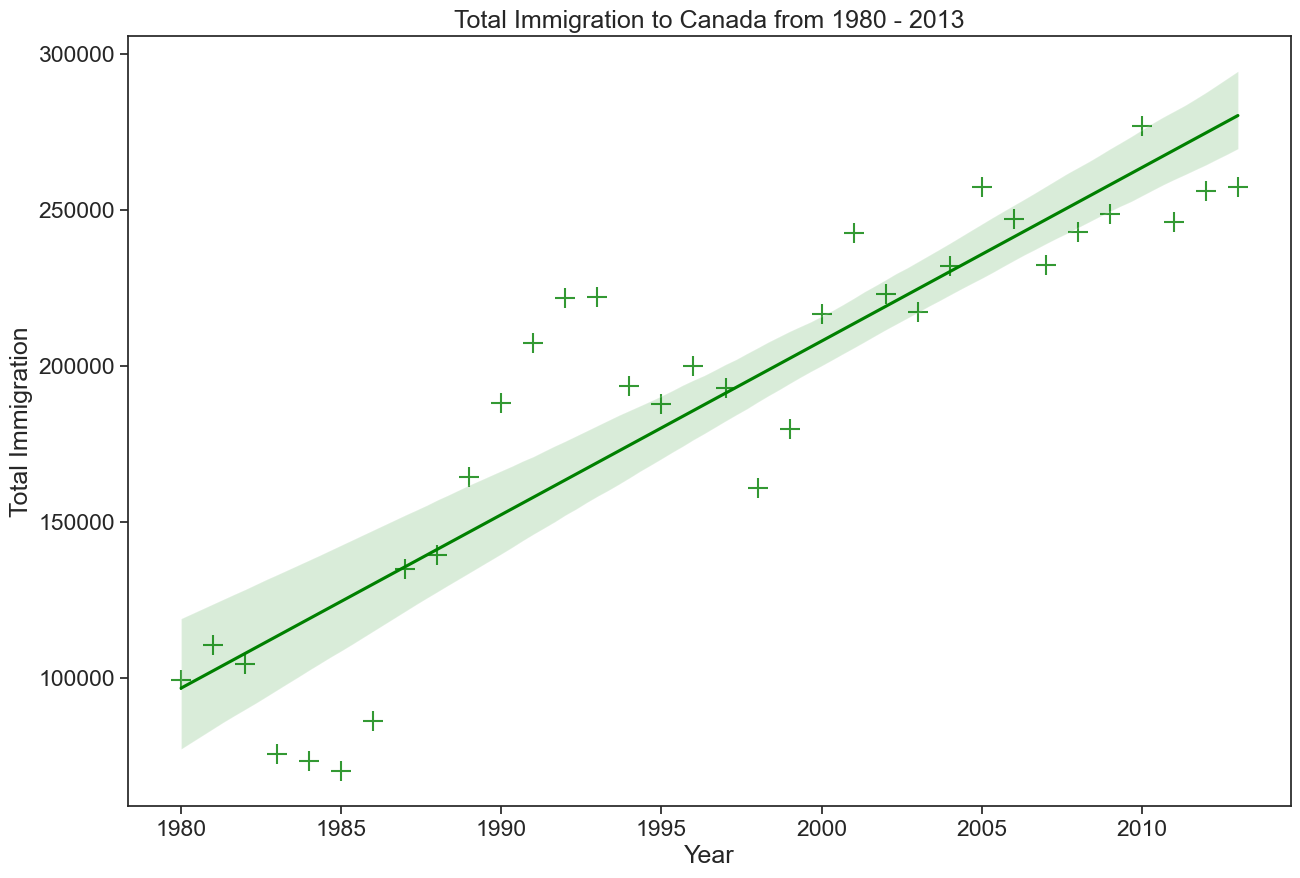

In [78]:
plt.figure(figsize=(15,10))

sns.set(font_scale=1.5)
sns.set_style('ticks') # merubah background menjadi putih tanpa grid

ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s':200})

ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

### Question
**Use seaborn to create a scatter plot with a regression line to visualize the total immigration from Denmark, Sweden, and Norway to Canada from 1980 to 2013**

In [79]:
df_can.loc[['Denmark', 'Norway', 'Sweden'], years]

1980  1981  1982  1983  1984  1985  1986  1987  1988  1989  ...  \
Country                                                              ...   
Denmark   272   293   299   106    93    73    93   109   129   129  ...   
Norway    116    77   106    51    31    54    56    80    73    76  ...   
Sweden    281   308   222   176   128   158   187   198   171   182  ...   

         2004  2005  2006  2007  2008  2009  2010  2011  2012  2013  
Country                                                              
Denmark    89    62   101    97   108    81    92    93    94    81  
Norway     73    57    53    73    66    75    46    49    53    59  
Sweden    129   205   139   193   165   167   159   134   140   140  

[3 rows x 34 columns]

In [80]:
# membuat dataframe df_countries
df_countries  = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries

Country  Denmark  Norway  Sweden
1980         272     116     281
1981         293      77     308
1982         299     106     222
1983         106      51     176
1984          93      31     128
1985          73      54     158
1986          93      56     187
1987         109      80     198
1988         129      73     171
1989         129      76     182
1990         118      83     130
1991         111     103     167
1992         158      74     179
1993         186      92     203
1994          93      60     192
1995         111      65     176
1996          70      70     161
1997          83     104     151
1998          63      31     123
1999          81      36     170
2000          93      56     138
2001          81      78     184
2002          70      74     149
2003          89      77     161
2004          89      73     129
2005          62      57     205
2006         101      53     139
2007          97      73     193
2008         108      66     165
2009          81      75     167
2010          92      46     159
2011          93      49     134
2012          94      53     140
2013          81      59     140

In [81]:
# membuat df_tot yang berisi penjumlahan dari 3 negara pada setiap tahun
df_tot = pd.DataFrame(df_countries.sum(axis=1))
df_tot

0
1980  669
1981  678
1982  627
1983  333
1984  252
1985  285
1986  336
1987  387
1988  373
1989  387
1990  331
1991  381
1992  411
1993  481
1994  345
1995  352
1996  301
1997  338
1998  217
1999  287
2000  287
2001  343
2002  293
2003  327
2004  291
2005  324
2006  293
2007  363
2008  339
2009  323
2010  297
2011  276
2012  287
2013  280

In [82]:
# mereset index
df_tot.reset_index(inplace=True)
df_tot.index

RangeIndex(start=0, stop=34, step=1)

In [83]:
# rename kolom
df_tot.columns = ['year', 'total']
df_tot

year  total
0   1980    669
1   1981    678
2   1982    627
3   1983    333
4   1984    252
5   1985    285
6   1986    336
7   1987    387
8   1988    373
9   1989    387
10  1990    331
11  1991    381
12  1992    411
13  1993    481
14  1994    345
15  1995    352
16  1996    301
17  1997    338
18  1998    217
19  1999    287
20  2000    287
21  2001    343
22  2002    293
23  2003    327
24  2004    291
25  2005    324
26  2006    293
27  2007    363
28  2008    339
29  2009    323
30  2010    297
31  2011    276
32  2012    287
33  2013    280

In [84]:
# merubah kolom year dari string menjadi int untuk membuat scatter plot
df_tot['year'] = df_tot['year'].astype(int)
df_tot

year  total
0   1980    669
1   1981    678
2   1982    627
3   1983    333
4   1984    252
5   1985    285
6   1986    336
7   1987    387
8   1988    373
9   1989    387
10  1990    331
11  1991    381
12  1992    411
13  1993    481
14  1994    345
15  1995    352
16  1996    301
17  1997    338
18  1998    217
19  1999    287
20  2000    287
21  2001    343
22  2002    293
23  2003    327
24  2004    291
25  2005    324
26  2006    293
27  2007    363
28  2008    339
29  2009    323
30  2010    297
31  2011    276
32  2012    287
33  2013    280

Text(0.5, 1.0, 'Total Immigration from Denmark, Norwegia, and Swedia to Canada from 1980-2013')

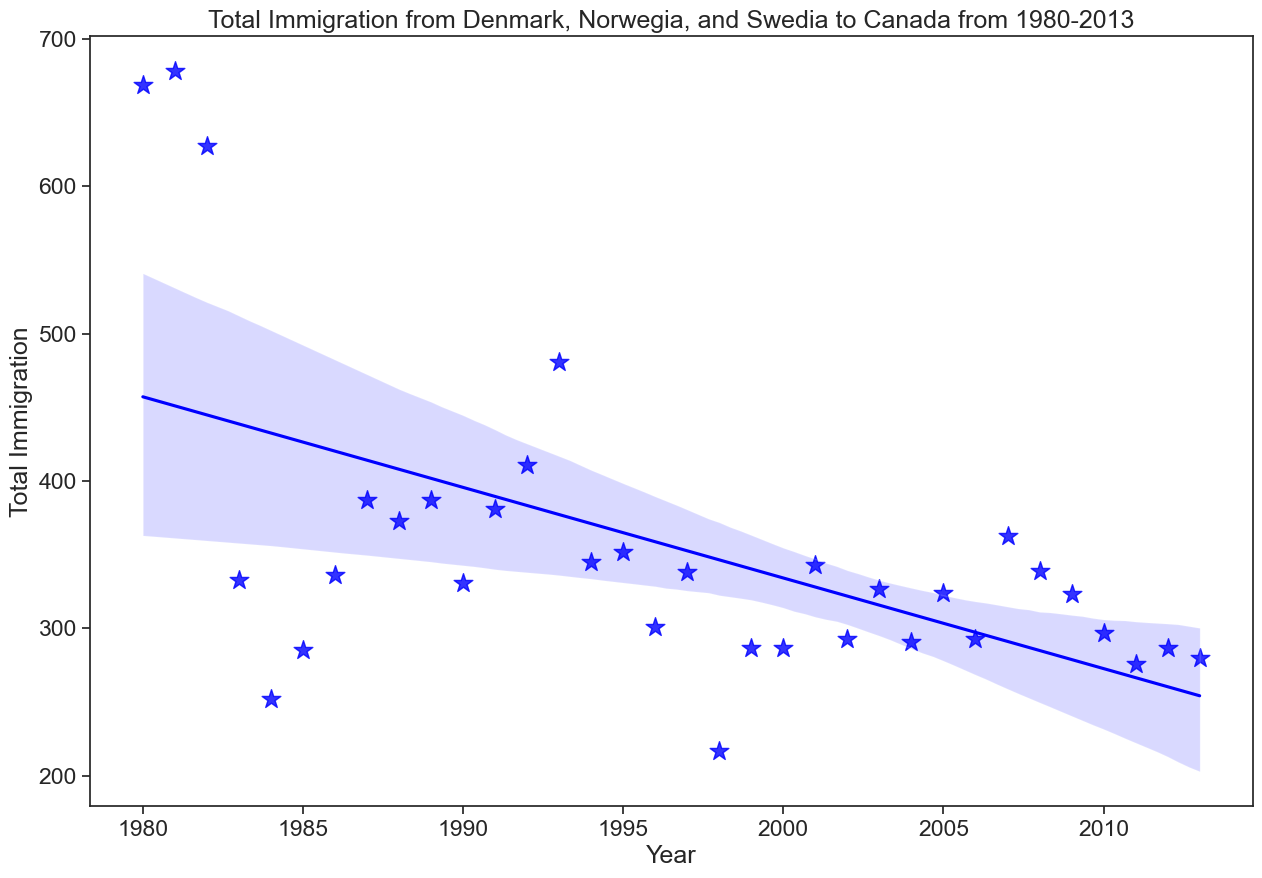

In [85]:
# mengatur ukuran figure
plt.figure(figsize=(15,10))

# menentukan background style dan ukuran font
sns.set(font_scale=1.5)
sns.set_style('ticks')

# generate plot, menambahkan judul dan axes label
ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='*', scatter_kws={'s':200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Norwegia, and Swedia to Canada from 1980-2013')

# Advanced Visualization 2
Di section ini, kita akan mempelajari cara membuat peta untuk berbagai tujuan. Untuk melakukannya, kita akan berpisah dengan Matplotlib dan bekerja dengan pustaka visualisasi Python lain, yaitu Folium. Keuntungan dari Folium adalah bahwa Folium dikembangkan dengan tujuan untuk memvisualisasikan data geospasial. Meskipun pustaka lain tersedia untuk memvisualisasikan data geospasial, seperti plotly, pustaka tersebut mungkin memiliki batasan pada berapa banyak panggilan API yang dapat kalian lakukan dalam kerangka waktu yang ditentukan. Folium, di sisi lain, sepenuhnya gratis.

Toolkit: Section ini sangat bergantung pada pandas dan Numpy untuk data wrangling, analysis, dan visualization. Perpustakaan plotting utama yang akan kita jelajahi di section ini adalah Folium.

Datasets:

1. Insiden Departemen Kepolisian San Francisco untuk tahun 2016 - Insiden Departemen Kepolisian dari portal data publik San Francisco. Insiden berasal dari sistem Pelaporan Insiden Kejahatan Departemen Kepolisian San Francisco (SFPD). Diperbarui setiap hari, menampilkan data sepanjang tahun 2016. Alamat dan lokasi telah dianonimkan dengan pindah ke blok tengah atau ke persimpangan.

2. Imigrasi ke Kanada dari 1980 hingga 2013 - Aliran migrasi internasional ke dan dari negara-negara tertentu - Revisi 2015 dari situs web Perserikatan Bangsa-Bangsa. Dataset tersebut berisi data tahunan arus migran internasional yang dicatat oleh negara tujuan. Data tersebut menyajikan arus masuk dan arus keluar menurut tempat lahir, kewarganegaraan atau tempat tinggal sebelumnya/selanjutnya baik untuk orang asing maupun warga negara. Untuk pelajaran ini, kami akan fokus pada data Imigrasi Kanada

## Introduction to Folium
Folium adalah pustaka Python andal yang membantu kalian membuat beberapa jenis peta Leaflet. Fakta bahwa hasil Folium bersifat interaktif membuat perpustakaan ini sangat berguna untuk pembuatan dasbor.

Dari halaman dokumentasi resmi Folium:

Folium dibangun di atas kekuatan perselisihan data ekosistem Python dan kekuatan pemetaan pustaka Leaflet.js. Manipulasi data Anda dengan Python, lalu visualisasikan di peta Leaflet melalui Folium.

Folium memudahkan untuk memvisualisasikan data yang telah dimanipulasi dengan Python pada peta Leaflet interaktif. Ini memungkinkan pengikatan data ke peta untuk visualisasi choropleth serta melewatkan visualisasi Vincent/Vega sebagai penanda di peta.

Pustaka memiliki sejumlah ubin bawaan dari OpenStreetMap, Mapbox, dan Stamen, dan mendukung ubin khusus dengan kunci API Mapbox atau Cloudmade. Folium mendukung overlay GeoJSON dan TopoJSON, serta pengikatan data ke overlay tersebut untuk membuat peta choropleth dengan skema warna color-brewer.

In [86]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [87]:
import folium
print('Folium installed and imported!')

Folium installed and imported!


Membuat peta dunia sangat mudah di Folium. Kalian cukup membuat objek Map Folium dan kemudian menampilkannya. Hal yang menarik dari peta Folium adalah peta tersebut interaktif, sehingga kalian dapat memperbesar setiap wilayah yang diinginkan meskipun pada tingkat zoom awal.

In [88]:
# mendefinisikan world map
world_map = folium.Map()

# menampilkan world map
world_map

Coba perbesar dan perkecil peta yang dirender di atas.

Kalian dapat menyesuaikan definisi default peta dunia ini dengan menentukan pusat peta kalian dan tingkat zoom awal.

Semua lokasi di peta ditentukan oleh nilai Lintang dan Bujurnya masing-masing. Jadi kalian dapat membuat peta dan melewati di tengah nilai Lintang dan Bujur [0, 0].

Untuk pusat yang ditentukan, kalian juga dapat menentukan tingkat zoom awal ke lokasi itu saat peta dirender. Semakin tinggi tingkat zoom peta semakin diperbesar ke tengah.

Mari buat peta yang berpusat di sekitar Semarang dan mainkan dengan tingkat zoom untuk melihat bagaimana pengaruhnya terhadap peta yang dibuat.

In [89]:
# membuat peta yang berpusat di sekitar Semarang dengan tingkat zoom rendah
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

world_map

Membuat peta lagi dengan tingkat zoom yang lebih tinggi

In [90]:
# membuat peta yang berpusat di sekitar Semarang dengan tingkat zoom lebih tinggi
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=11)

world_map

Semakin tinggi tingkat zoom peta maka semakin diperbesar ke pusat yang diberikan

#### Question
**Buatlah map dari Hacktiv8 dengan zoom level = 15**

In [91]:
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)

world_map

Fitur keren lainnya dari Folium adalah kalian dapat menghasilkan gaya peta yang berbeda.

### A. Stamen Toner Maps
Stamen Toner adalah peta B+W (hitam dan putih) dengan kontras tinggi. Stamen Toner sempurna untuk data mashup dan menjelajahi kelokan sungai/river meanders dan zona pesisir/coastal zones.

Mari buat peta Stamen Toner Semarang dengan tingkat zoom 13.

In [92]:
# membuat peta Stamen Toner di sekitar Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Toner')

world_map

### B. Stamen Terrain Maps
Stamen Terrain adalah peta yang menampilkan bayangan bukit dan warna vegetasi alami. Stamen Terrain menampilkan pelabelan lanjutan dan generalisasi garis dari jalan dengan dua jalur.

Mari buat peta Stamen Terrain Semarang dengan tingkat zoom 13.

In [93]:
# membuat peta Stamen Terrain di sekitar Semarang
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')

world_map

## Maps with Markers

In [94]:
df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')
print('Dataset downloaded and read into a pandas dataframe!')

Dataset downloaded and read into a pandas dataframe!


In [95]:
df_incidents.head()

IncidntNum      Category                                        Descript  \
0   120058272   WEAPON LAWS                       POSS OF PROHIBITED WEAPON   
1   120058272   WEAPON LAWS  FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE   
2   141059263      WARRANTS                                  WARRANT ARREST   
3   160013662  NON-CRIMINAL                                   LOST PROPERTY   
4   160002740  NON-CRIMINAL                                   LOST PROPERTY   

  DayOfWeek                    Date   Time  PdDistrict      Resolution  \
0    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
1    Friday  01/29/2016 12:00:00 AM  11:00    SOUTHERN  ARREST, BOOKED   
2    Monday  04/25/2016 12:00:00 AM  14:59     BAYVIEW  ARREST, BOOKED   
3   Tuesday  01/05/2016 12:00:00 AM  23:50  TENDERLOIN            NONE   
4    Friday  01/01/2016 12:00:00 AM  00:30     MISSION            NONE   

                  Address           X          Y  \
0  800 Block of BRYANT ST -122.403405  37.775421   
1  800 Block of BRYANT ST -122.403405  37.775421   
2   KEITH ST / SHAFTER AV -122.388856  37.729981   
3  JONES ST / OFARRELL ST -122.412971  37.785788   
4    16TH ST / MISSION ST -122.419672  37.765050   

                                Location            PdId  
0   (37.775420706711, -122.403404791479)  12005827212120  
1   (37.775420706711, -122.403404791479)  12005827212168  
2  (37.7299809672996, -122.388856204292)  14105926363010  
3  (37.7857883766888, -122.412970537591)  16001366271000  
4  (37.7650501214668, -122.419671780296)  16000274071000

Jadi setiap baris terdiri dari 13 fitur:

* IncidentNum: Nomor Insiden
* Kategori: Kategori kejahatan atau insiden
* Deskripsi: Deskripsi kejahatan atau insiden
* DayOfWeek: Hari di mana insiden itu terjadi
* Tanggal: Tanggal terjadinya insiden
* Waktu: Waktu hari di mana insiden itu terjadi
* PdDistrict: Distrik departemen kepolisian
* Resolusi: Penyelesaian kejahatan dalam hal apakah pelaku ditangkap atau tidak
* Alamat: Alamat terdekat dengan tempat kejadian
* X: Nilai bujur dari lokasi kejahatan
* Y: Nilai garis lintang lokasi kejahatan
* Lokasi: Tuple nilai lintang dan bujur
* PdId: ID departemen kepolisian

Mari kita cari tahu berapa banyak entri di kumpulan data kita.

In [96]:
df_incidents.shape

(150500, 13)

Jadi dataframe kita terdiri dari 150.500 kejahatan, yang terjadi pada tahun 2016. Untuk mengurangi computational cost, mari kita bekerja dengan hanya 100 insiden pertama dalam kumpulan data ini.

In [97]:
# mengambil 100 kejahatan pertama pada dataframe df_incidents
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

Mari kita konfirmasikan bahwa dataframe kita sekarang hanya terdiri dari 100 kejahatan.

In [98]:
df_incidents.shape

(100, 13)

Sekarang setelah kita sedikit mengurangi datanya, mari kita visualisasikan dimana kejahatan terjadi di kota San Francisco. Kita akan menggunakan gaya default dan kita akan menginisialisasi tingkat zoom ke 12.

In [99]:
# garis lintang dan garis bujur dari San Francisco
latitude = 37.77
longitude = -122.42

In [100]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)
sanfran_map

Sekarang mari kita taruh lokasi kejahatan ke dalam peta. Cara untuk melakukannya di Folium adalah dengan membuat feature group dengan fitur dan gayanya sendiri, lalu menambahkannya ke sanfran_map.

In [101]:
# menginstansiasi fitur grup untuk insiden pada dataframe
incidents = folium.map.FeatureGroup()

# loop sampai 100 kejahatan dan tambahkan masing-masing ke grup fitur insiden
# y adalah garis lintang, x garis bujur
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat,lng],
            radius=5, # mendefinisikan seberapa besar penanda lingkaran
            color='red',
            fill=True,
            fill_color='darkblue',
            fill_opacity=0.6
        )
    )

# menambahkan insiden ke peta
sanfran_map.add_child(incidents)

Kita juga dapat menambahkan beberapa teks pop-up yang akan ditampilkan saat mengarahkan kursor ke atas marker. Mari buat setiap penanda menampilkan kategori kejahatan saat diarahkan ke atas marker.

In [102]:
# menginstansiasi fitur grup untuk insiden pada dataframe
incidents = folium.map.FeatureGroup()

# loop sampai 100 kejahatan dan tambahkan masing-masing ke grup fitur insiden
# y adalah garis lintang, x garis bujur
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat,lng],
            radius=5, # mendefinisikan seberapa besar penanda lingkaran
            color='red',
            fill=True,
            fill_color='darkblue',
            fill_opacity=0.6
        )
    )

# menambahkan insiden ke peta
sanfran_map.add_child(incidents)

# menambahkan teks pop-up untuk masing-masing penanda pada peta
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

# menambahkan insiden ke map
sanfran_map.add_child(incidents)

Sekarang kita dapat mengetahui kategori kejahatan apa yang terjadi di setiap marker.

Jika kalian menyadari peta menjadi sangat padat akan semua marker ini, ada dua solusi untuk masalah ini. Solusi yang lebih sederhana adalah dengan menghapus marker lokasi ini dan menambahkan teks ke marker lingkaran itu sendiri sebagai berikut:

In [103]:
# membuat peta dan menampilkannya
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# loop sampai 100 kejahatan dan tambahkan masing-masing ke grup fitur insiden
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
        folium.CircleMarker(
            [lat,lng],
            radius=5, # mendefinisikan seberapa besar penanda lingkaran
            color='red',
            fill=True,
            popup=label,
            fill_color='darkblue',
            fill_opacity=0.6
        ).add_to(sanfran_map)
        
# tampilkan peta        
sanfran_map

Solusi lain yang tepat adalah dengan mengelompokkan marker ke dalam cluster yang berbeda. Setiap cluster kemudian diwakili oleh jumlah kejahatan di setiap lingkungan. Cluster ini dapat dianggap sebagai kantong dari kejahatan San Francisco yang kemudian dapat kalian analisis secara terpisah.

Untuk mengimplementasikannya, kita mulai dengan membuat instance objek MarkerCluster dan menambahkan semua titik data di dataframe ke objek ini.

In [104]:
from folium import plugins

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# instansiasi sebuah penanda cluster objek untuk insiden pada dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop melalui dataframe dan tambahkan masing-masing poin data untuk penanda cluster
for lat, lng, label in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
        folium.Marker(
            [lat,lng],
            icon=None,
            popup=label,
        ).add_to(incidents)

# tampilkan peta
sanfran_map

Perhatikan bagaimana saat kalian memperkecil sepenuhnya, semua marker dikelompokkan ke dalam satu cluster, cluster global, dari 100 marker atau kejahatan, yang merupakan jumlah total kejahatan dalam dataframe kita. Setelah kalian mulai memperbesar, cluster global akan mulai dibagi menjadi beberapa cluster yang lebih kecil. Memperbesar sepenuhnya akan menghasilkan marker individual.

## Choropleth Maps
Peta Choropleth adalah peta tematik di mana area diarsir atau berpola sebanding dengan pengukuran variabel statistik yang ditampilkan di peta, seperti kepadatan penduduk atau pendapatan per kapita. Peta choropleth memberikan cara mudah untuk memvisualisasikan bagaimana suatu pengukuran bervariasi di seluruh wilayah geografis atau menunjukkan tingkat variabilitas dalam suatu wilayah. Di bawah ini adalah peta Choropleth AS yang menggambarkan populasi dengan mil persegi per negara bagian.

Sekarang, mari buat peta Choropleth dunia kita sendiri yang menggambarkan imigrasi dari berbagai negara ke Canada.

Pertama-tama, unduh dan impor kumpulan data imigrasi Kanada utama kita sebelumnya menggunakan metode pandas read_excel(). Biasanya, sebelum kita bisa melakukannya, kita perlu mengunduh modul yang dibutuhkan panda untuk dibaca di file excel. Modul ini xlrd.

In [105]:
df_can = pd.read_excel('https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
                     sheet_name='Canada by Citizenship',
                     skiprows=range(20),
                     skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


In [106]:
df_can.head()

Type    Coverage          OdName  AREA AreaName   REG  \
0  Immigrants  Foreigners     Afghanistan   935     Asia  5501   
1  Immigrants  Foreigners         Albania   908   Europe   925   
2  Immigrants  Foreigners         Algeria   903   Africa   912   
3  Immigrants  Foreigners  American Samoa   909  Oceania   957   
4  Immigrants  Foreigners         Andorra   908   Europe   925   

           RegName  DEV             DevName  1980  ...  2004  2005  2006  \
0    Southern Asia  902  Developing regions    16  ...  2978  3436  3009   
1  Southern Europe  901   Developed regions     1  ...  1450  1223   856   
2  Northern Africa  902  Developing regions    80  ...  3616  3626  4807   
3        Polynesia  902  Developing regions     0  ...     0     0     1   
4  Southern Europe  901   Developed regions     0  ...     0     0     1   

   2007  2008  2009  2010  2011  2012  2013  
0  2652  2111  1746  1758  2203  2635  2004  
1   702   560   716   561   539   620   603  
2  3623  4005  5393  4752  4325  3774  4331  
3     0     0     0     0     0     0     0  
4     1     0     0     0     0     1     1  

[5 rows x 43 columns]

In [107]:
df_can.shape

(195, 43)

Bersihkan data. Kita akan melakukan beberapa modifikasi pada dataset asli untuk mempermudah pembuatan visualisasi kita. 

In [108]:
# membersihkan dataset untuk menghapus kolom yang tidak perlu
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

# mengganti nama kolom
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)

# membuat seluruh label kolom bertipe data string
df_can.columns = list(map(str, df_can.columns))

# menambahkan kolom total
df_can['Total'] = df_can.sum(axis=1)

# years akan digunakan untuk plotting nanti
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 39)


C:\Users\ria\AppData\Local\Temp\ipykernel_23628\1205225981.py:11: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


In [109]:
df_can.head()

Country Continent           Region             DevName  1980  1981  \
0     Afghanistan      Asia    Southern Asia  Developing regions    16    39   
1         Albania    Europe  Southern Europe   Developed regions     1     0   
2         Algeria    Africa  Northern Africa  Developing regions    80    67   
3  American Samoa   Oceania        Polynesia  Developing regions     0     1   
4         Andorra    Europe  Southern Europe   Developed regions     0     0   

   1982  1983  1984  1985  ...  2005  2006  2007  2008  2009  2010  2011  \
0    39    47    71   340  ...  3436  3009  2652  2111  1746  1758  2203   
1     0     0     0     0  ...  1223   856   702   560   716   561   539   
2    71    69    63    44  ...  3626  4807  3623  4005  5393  4752  4325   
3     0     0     0     0  ...     0     1     0     0     0     0     0   
4     0     0     0     0  ...     0     1     1     0     0     0     0   

   2012  2013  Total  
0  2635  2004  58639  
1   620   603  15699  
2  3774  4331  69439  
3     0     0      6  
4     1     1     15  

[5 rows x 39 columns]

Untuk membuat peta Choropleth, kita membutuhkan file GeoJSON yang mendefinisikan area / batas negara bagian, kabupaten, atau negara yang kita minati. Dalam kasus kita, karena kita berusaha untuk membuat peta dunia, kita menginginkan sebuah GeoJSON yang mendefinisikan batas-batas semua negara dunia. 

Unduh file GeoJSON terlebih dahulu melalui [link berikut](https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json)

In [117]:
world_geo = r'data/world_countries.json'

In [118]:
world_geo

'data/world_countries.json'

In [119]:
world_geo = r'data/world_countries.json'

# membuat peta dunia polosan
world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='OpenStreet Map')

# generate peta choropleth menggunakan total imigrasi masing-masing negara ke Canada dari 1980-2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# menampilkan peta
world_map

C:\Users\ria\anaconda3\lib\site-packages\folium\folium.py:465: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(
